# EXERCISE: Glass Identification (aka "Glassification")

## TASK 1: read the data into a DataFrame

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd

In [2]:

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data'
col_names = ['id','ri','na','mg','al','si','k','ca','ba','fe','glass_type']
df = pd.read_csv(url, names=col_names, index_col='id')
df.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type
id,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


## TASK 2: briefly explore the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 214 entries, 1 to 214
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ri          214 non-null    float64
 1   na          214 non-null    float64
 2   mg          214 non-null    float64
 3   al          214 non-null    float64
 4   si          214 non-null    float64
 5   k           214 non-null    float64
 6   ca          214 non-null    float64
 7   ba          214 non-null    float64
 8   fe          214 non-null    float64
 9   glass_type  214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 18.4 KB


In [4]:
correlation_matrix= df.corr()
correlation_matrix

,ri,na,mg,al,si,k,ca,ba,fe,glass_type
ri,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
k,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
glass_type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


<Axes: >

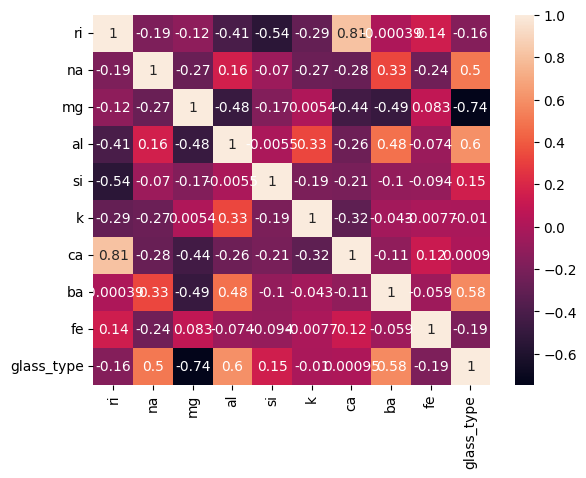

In [5]:
import seaborn as sns
# Create a heatmap
sns.heatmap(correlation_matrix, annot=True)

In [6]:
df.glass_type.unique()

array([1, 2, 3, 5, 6, 7])

In [7]:
df.groupby('glass_type')['glass_type'].sum()

glass_type
1     70
2    152
3     51
5     65
6     54
7    203
Name: glass_type, dtype: int64

## TASK 3: convert into binary classification problem 

Convert this into a binary classification problem. Create a new DataFrame column called "binary":

1.	If type of glass = 1/2/3/4, set binary = 0.

2.	If type of glass = 5/6/7, set binary = 1.

In [8]:
# Define a function to map glass types to binary values
def map_glass_to_binary(glass_type):
    if glass_type in [1, 2, 3, 4]:
        return 0
    else:
        return 1
    


In [9]:
# Apply the function to create the 'binary' column
df['binary'] = df['glass_type'].map(map_glass_to_binary)
df.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,binary
id,,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,0
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,0
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,0
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,0
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,0


In [10]:
correlation_matrix=df.corr()
correlation_matrix

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,binary
ri,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237,-0.134327
na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898,0.452336
mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993,-0.758289
al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829,0.585928
si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565,0.148072
k,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054,0.053774
ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952,0.040670
ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161,0.523403
fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278,-0.194903
glass_type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000,0.941680


<Axes: >

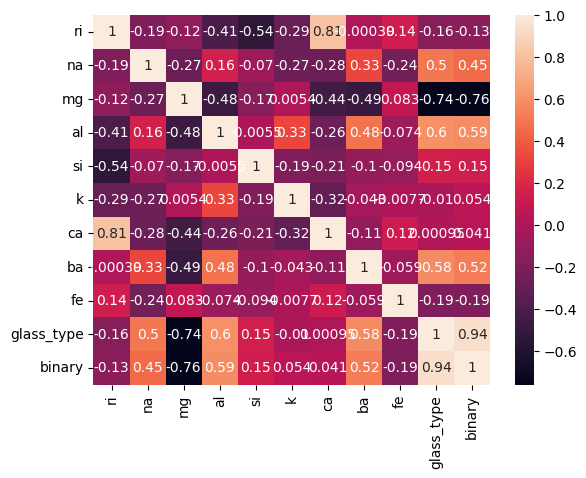

In [11]:
# Create a heatmap
sns.heatmap(correlation_matrix, annot=True)

In [12]:
df.binary.unique()

array([0, 1])

In [13]:
df.binary.value_counts()

binary
0    163
1     51
Name: count, dtype: int64

## TASK 4: create a feature matrix (X) using all features 

In [14]:
# Create the feature matrix X
# Exclude 'type' and 'binary' columns if they exist
X = df.drop(columns=['glass_type', 'binary'])  

# Display the feature matrix
X.head()

,ri,na,mg,al,si,k,ca,ba,fe
id,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


## TASK 5: create a response vector (y)

In [15]:
y=df.binary
y

id
1      0
2      0
3      0
4      0
5      0
      ..
210    1
211    1
212    1
213    1
214    1
Name: binary, Length: 214, dtype: int64

## TASK 6: split X and y into training and testing set

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
# Display the shapes of the training and testing sets
print("X shape:",X.shape)
print("y shape:",y.shape)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X shape: (214, 9)
y shape: (214,)
X_train shape: (171, 9)
X_test shape: (43, 9)
y_train shape: (171,)
y_test shape: (43,)


## TASK 7: fit a KNN model on the training set using K=5

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score

# Create a knn with K=5
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the knn to the training data
knn.fit(X_train, y_train)

KNeighborsClassifier()

## TASK 8: make predictions on the testing set and calculate testing accuracy

In [20]:
y_pred=knn.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0])

In [21]:
y_pred.shape

(43,)

In [22]:
y_pred.sum()

13

In [23]:
pred_false=43-13
pred_false

30

In [24]:
from sklearn import metrics
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
conf_matrix

array([[28,  0],
       [ 2, 13]])

In [25]:
# manually looking from confusion matrix
(28+13)/(28+0+2+13)

0.9534883720930233

In [26]:
# Calculate testing accuracy
test_accuracy = accuracy_score(y_test, y_pred)
test_accuracy

0.9534883720930233

## TASK 9: write a for loop that computes testing accuracy for a range of K values

In [29]:


# Initialize an empty list to store testing accuracies for each value of K
train_accuracies=[]
test_accuracies = []

# Iterate over the range of K values
for k in range(1,21):
    # Create a KNN classifier with the current value of K
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the KNN classifier to the training data
    knn_classifier.fit(X_train, y_train)
    
    # accuracies on the train set
    y_pred_tr = knn_classifier.predict(X_test)
    train_accuracy = accuracy_score(y_test, y_pred_tr)
    train_accuracies.append(train_accuracy)
    
    # accuracies on the test set
    y_pred_te = knn_classifier.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred_te)
    test_accuracies.append(test_accuracy)
    
    '''
    
    # Make predictions on the testing set
    y_pred = knn_classifier.predict(X_test)
    
    # Calculate testing accuracy
    test_accuracy = accuracy_score(y_test, y_pred)
    
    # Append the testing accuracy to the list
    test_accuracies.append(test_accuracy)
    
    '''

print("train accuracies:",train_accuracies)
print()
print("test accuracies:",test_accuracies)

train accuracies: [1.0, 0.9767441860465116, 0.9767441860465116, 0.9302325581395349, 0.9534883720930233, 0.8837209302325582, 0.9302325581395349, 0.9302325581395349, 0.9302325581395349, 0.9302325581395349, 0.9302325581395349, 0.9302325581395349, 0.9302325581395349, 0.9302325581395349, 0.9534883720930233, 0.9534883720930233, 0.9534883720930233, 0.9534883720930233, 0.9534883720930233, 0.9302325581395349]

test accuracies: [1.0, 0.9767441860465116, 0.9767441860465116, 0.9302325581395349, 0.9534883720930233, 0.8837209302325582, 0.9302325581395349, 0.9302325581395349, 0.9302325581395349, 0.9302325581395349, 0.9302325581395349, 0.9302325581395349, 0.9302325581395349, 0.9302325581395349, 0.9534883720930233, 0.9534883720930233, 0.9534883720930233, 0.9534883720930233, 0.9534883720930233, 0.9302325581395349]


In [30]:
# Print the testing accuracies for each value of K
for k, accuracy in zip(range(1,21), test_accuracies):
    print(f"k = {k}   :  Test Accuracy = {accuracy}")

k = 1   :  Test Accuracy = 1.0
k = 2   :  Test Accuracy = 0.9767441860465116
k = 3   :  Test Accuracy = 0.9767441860465116
k = 4   :  Test Accuracy = 0.9302325581395349
k = 5   :  Test Accuracy = 0.9534883720930233
k = 6   :  Test Accuracy = 0.8837209302325582
k = 7   :  Test Accuracy = 0.9302325581395349
k = 8   :  Test Accuracy = 0.9302325581395349
k = 9   :  Test Accuracy = 0.9302325581395349
k = 10   :  Test Accuracy = 0.9302325581395349
k = 11   :  Test Accuracy = 0.9302325581395349
k = 12   :  Test Accuracy = 0.9302325581395349
k = 13   :  Test Accuracy = 0.9302325581395349
k = 14   :  Test Accuracy = 0.9302325581395349
k = 15   :  Test Accuracy = 0.9534883720930233
k = 16   :  Test Accuracy = 0.9534883720930233
k = 17   :  Test Accuracy = 0.9534883720930233
k = 18   :  Test Accuracy = 0.9534883720930233
k = 19   :  Test Accuracy = 0.9534883720930233
k = 20   :  Test Accuracy = 0.9302325581395349


In [32]:
from sklearn.model_selection import cross_val_score

# Initialize an empty list to store testing accuracies for each value of K
# train_accuracies=[]
# test_accuracies = []

scores=[]
# Iterate over the range of K values
for k in range(1,21):
    # Create a KNN classifier with the current value of K
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # apply cross validation
    score = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    scores.append(score.mean())
scores
    

[0.9337662337662337,
 0.9019480519480518,
 0.8963203463203463,
 0.8645021645021644,
 0.8779220779220779,
 0.8597402597402597,
 0.8872294372294374,
 0.8642857142857142,
 0.8595238095238095,
 0.8597402597402599,
 0.8595238095238095,
 0.8645021645021647,
 0.8645021645021647,
 0.8645021645021647,
 0.8783549783549784,
 0.8692640692640692,
 0.8692640692640692,
 0.8692640692640692,
 0.8692640692640692,
 0.8692640692640692]

In [33]:
L1=[1,2,3]
L2=[4,5,6]
L=zip(L1,L2)
list(L)

[(1, 4), (2, 5), (3, 6)]

## TASK 10: plot K value versus testing accuracy to choose on optimal value for K

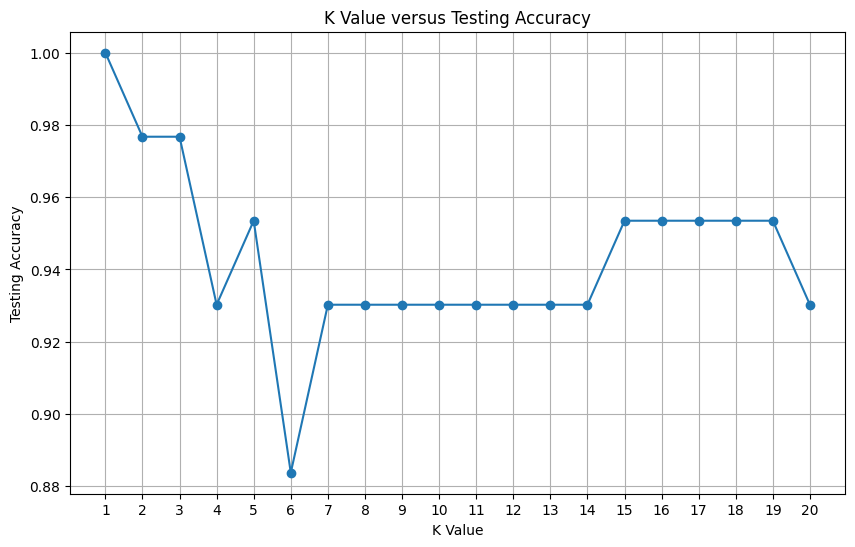

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot K value versus testing accuracy
plt.figure(figsize=(10, 6))
plt.plot(range(1,21), test_accuracies, marker='o', linestyle='-')
plt.title('K Value versus Testing Accuracy')
plt.xlabel('K Value')
plt.ylabel('Testing Accuracy')
plt.xticks(range(1,21))
plt.grid(True)
plt.show()


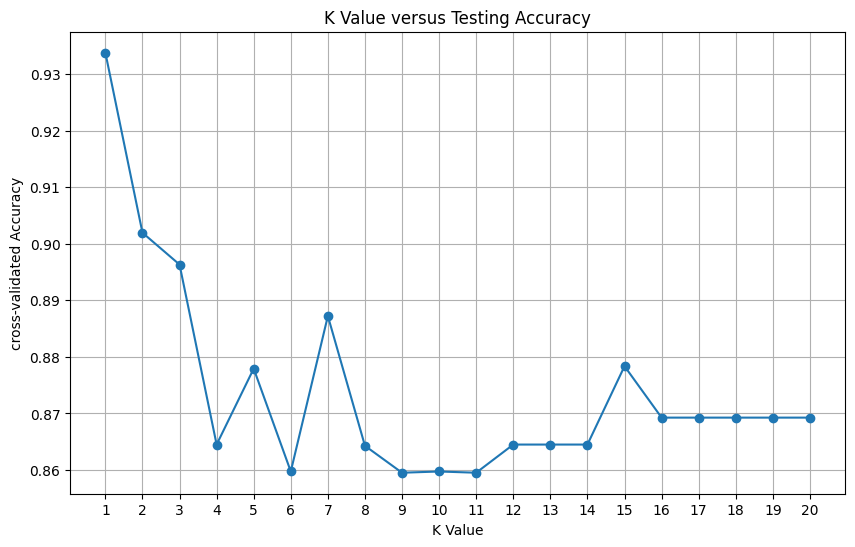

In [35]:
# Plot K value versus testing accuracy
plt.figure(figsize=(10, 6))
plt.plot(range(1,21), scores, marker='o', linestyle='-')
plt.title('K Value versus Testing Accuracy')
plt.xlabel('K Value')
plt.ylabel('cross-validated Accuracy')
plt.xticks(range(1,21))
plt.grid(True)
plt.show()


## TASK 11: calculate the null accuracy (see instructions for explanation)

In [ ]:
df.binary.value_counts()

In [ ]:
# from actual 
51/(163+51)

In [36]:
y_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0])

In [37]:
y_pred.sum()

13

In [ ]:
y_pred.shape

In [ ]:
conf_matrix

In [ ]:
y_test.value_counts()

In [ ]:
28/(28+15)

In [ ]:
# equivalent function in scikit-learn
from sklearn.dummy import DummyClassifier
dumb = DummyClassifier(strategy='most_frequent')
dumb.fit(X_train, y_train)
y_dumb_class = dumb.predict(X_test)
print (metrics.accuracy_score(y_test, y_dumb_class))

## TASK 12: search for useful features

In [ ]:
# redo exercise using only those features
feature_cols = ['mg','ba']

In [ ]:
X=df[feature_cols]
X.head()

In [ ]:
y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Display the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

In [ ]:
X_train.head()

In [ ]:
X_test.head()

In [ ]:
y_train.head()

In [ ]:
y_test.head()

In [ ]:
# Fit the knn to the training data
knn.fit(X_train, y_train)

In [ ]:
y_pred=knn.predict(X_test)
y_pred

In [ ]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
conf_matrix

In [ ]:
# manually 
accuracy=(28+9)/(28+0+6+9)
accuracy

In [ ]:
test_accuracy=accuracy_score(y_test,y_pred)
test_accuracy